# Goal

We would like to check the page tools instrumentation prior to deploying the feature. This instrumentation will help us answer the questions outlined in [T321229: Article tools instrumentation and measurement plan](https://phabricator.wikimedia.org/T321229) and make subsequent decisions

Data QA ticket: https://phabricator.wikimedia.org/T322204    
Engineer QA ticket: https://phabricator.wikimedia.org/T324878

# Instrumentation Note  
https://phabricator.wikimedia.org/T322204#8684502
https://phabricator.wikimedia.org/T322204#8700531

Run on March 9, 2023

__Old feature__  

<img src="Figures/old.png" width="800" height="600" align="center"/>

__New feature__  
Default
<br /> 
<img src="Figures/new2.png" width="800" height="600" align="center"/>
<br /> 
<img src="Figures/unpin.png" width="400" height="300" align="center"/>

<br /> 
Non-default
<br /> 
<img src="Figures/new1.png" width="800" height="600" align="center"/>

<br /> 
<img src="Figures/pin.png" width="400" height="300" align="center"/>
<br /> 


In [2]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
library(tidyverse); 
library(lubridate); 
library(scales);
library(magrittr); 
library(dplyr);
})

In [24]:
options(repr.plot.width = 12, repr.plot.height = 8)

# QA pin and unpin tools

## By wiki

In [80]:
query_tool_pins <- "
select wiki, event.skin, event.name,  COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND event.name IN (
-- To pin the page tool to the right sidebar
'pinnable-header.vector-page-tools.pin' ,
-- To unpin the page tool
 'pinnable-header.vector-page-tools.unpin'
) 
GROUP BY wiki, event.skin, event.name
"

In [81]:
df_tool_pins <- wmfdata::query_hive(query_tool_pins)

Don't forget to authenticate with Kerberos using kinit



In [82]:
df_tool_pins 

wiki,skin,name,event_tokens,clicks
<chr>,<chr>,<chr>,<int>,<int>
szywiki,vector-2022,pinnable-header.vector-page-tools.unpin,1,1
tiwiki,vector-2022,pinnable-header.vector-page-tools.unpin,2,2
ptwiktionary,vector-2022,pinnable-header.vector-page-tools.unpin,1,1
zhwikibooks,vector-2022,pinnable-header.vector-page-tools.pin,1,1
mwlwiki,vector-2022,pinnable-header.vector-page-tools.unpin,2,2
cvwiki,vector-2022,pinnable-header.vector-page-tools.unpin,3,3
shwiki,vector-2022,pinnable-header.vector-page-tools.unpin,2,2
ukwiki,vector-2022,pinnable-header.vector-page-tools.pin,11,12
mlwiki,vector-2022,pinnable-header.vector-page-tools.unpin,8,8


In [69]:
df_tool_pins [order(-df_tool_pins$event_tokens),] %>%
 filter(wiki=='enwiki') 

wiki,skin,name,event_tokens,clicks
<chr>,<chr>,<chr>,<int>,<int>
enwiki,vector-2022,pinnable-header.vector-page-tools.unpin,13641,16154
enwiki,vector-2022,pinnable-header.vector-page-tools.pin,2441,3438


In [70]:

 unique(df_tool_pins$wiki)

[1] "szywiki"          "tiwiki"           "ptwiktionary"    
  [4] "zhwikibooks"      "mwlwiki"          "cvwiki"          
  [7] "shwiki"           "ukwiki"           "mlwiki"          
 [10] "nlwikimedia"      "ttwiki"           "iswiki"          
 [13] "dinwiki"          "hrwiki"           "hewikisource"    
 [16] "bnwiktionary"     "adywiki"          "eswikibooks"     
 [19] "tumwiki"          "dewiktionary"     "kywiki"          
 [22] "banwiki"          "kowiktionary"     "simplewiki"      
 [25] "incubatorwiki"    "ptwiki"           "stwiki"          
 [28] "eowiktionary"     "oswiki"           "ruwikivoyage"    
 [31] "yiwiki"           "tetwiki"          "arwiktionary"    
 [34] "anwiki"           "fiwiki"           "labswiki"        
 [37] "uzwiki"           "kaawiki"          "zuwiki"          
 [40] "bjnwiki"          "trwiktionary"     "fawikisource"    
 [43] "mrwiki"           "outreachwiki"     "dvwiki"          
 [46] "gvwiki"           "viwiktionary"     "gdwiki"          
 [49] "nlwiki"           "cuwiki"           "sgwiki"          
 [52] "plwikisource"     "loginwiki"        "mkwiki"          
 [55] "enwiktionary"     "tswiki"           "wawiki"          
 [58] "mediawikiwiki"    "aswiki"           "dawiki"          
 [61] "srwiki"           "enwikiversity"    "metawiki"        
 [64] "nowikibooks"      "idwikisource"     "ocwiki"          
 [67] "furwiki"          "sswiki"           "arzwiki"         
 [70] "cawiki"           "enwiki"           "ckbwiki"         
 [73] "glkwiki"          "zh_classicalwiki" "lvwiki"          
 [76] "amwiki"           "astwiki"          "huwiki"          
 [79] "scnwiki"          "lowiki"           "swwiki"          
 [82] "vewiki"           "xalwiki"          "iawiki"          
 [85] "knwiki"           "wuuwiki"          "piwiki"          
 [88] "cewiki"           "wikimaniawiki"    "elwiktionary"    
 [91] "quwiki"           "fawikibooks"      "kowiki"          
 [94] "eswiki"           "chywiki"          "hywwiki"         
 [97] "wikidatawiki"     "bewiki"           "plwikimedia"     
[100] "arwiki"           "elwiki"           "ltwiki"          
[103] "shnwiki"          "mznwiki"          "tawikibooks"     
[106] "kswiki"           "stqwiki"          "arywiki"         
[109] "frwikinews"       "testwiki"         "azbwiki"         
[112] "kowikiversity"    "bnwikibooks"      "hewiki"          
[115] "commonswiki"      "fywiki"           "specieswiki"     
[118] "thwiki"           "frwikisource"     "plwikinews"      
[121] "eswikisource"     "enwikibooks"      "tawikinews"      
[124] "dewiki"           "frwiki"           "inhwiki"         
[127] "zhwiktionary"     "kmwiki"           "skrwiktionary"   
[130] "dewikivoyage"     "ruwiki"           "ruwikibooks"     
[133] "zhwikiquote"      "vowiki"           "ikwiki"          
[136] "mrjwiki"          "abwiki"           "pswiki"          
[139] "cowiki"           "sawiki"           "cawikiquote"     
[142] "orwiki"           "bnwiki"           "slwiki"          
[145] "bxrwiki"          "hewiktionary"     "ndswiki"         
[148] "bhwiki"           "tgwiki"           "enwikivoyage"    
[151] "barwiki"          "dewikiversity"    "bswiki"          
[154] "itwikisource"     "jawikisource"     "trwiki"          
[157] "trwikimedia"      "itwikinews"       "bnwikiquote"     
[160] "zh_yuewiki"       "fawiktionary"     "frwikiquote"     
[163] "ruwikisource"     "sqwiki"           "shnwikibooks"    
[166] "pntwiki"          "warwiki"          "papwiki"         
[169] "krcwiki"          "plwiktionary"     "hiwiki"          
[172] "jvwiki"           "bmwiki"           "dzwiki"          
[175] "tlwiki"           "iuwiki"           "frrwiki"         
[178] "trwikiquote"      "cywiki"           "skwiki"          
[181] "jawiki"           "lnwiki"           "ukwikiquote"     
[184] "svwiki"           "diqwiki"          "eswikiquote"     
[187] "cswikisource"     "gorwiki"          "vecwiki"         
[190] "afwiki"           "ptwikin

In [71]:
length( unique(df_tool_pins$wiki))

[1] 330

### Note

 As of March 9th,  schema logged tool pin/unpin events from 330 wikis.

## Daily trend

In [10]:
query_daily_pin <- "
SELECT TO_DATE(meta.dt) AS event_date,  event.name AS event_name, event.isAnon AS is_anon, COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND  event.name IN (
-- To pin the page tool to the right sidebar
'pinnable-header.vector-page-tools.pin' ,
-- To unpin the page tool
 'pinnable-header.vector-page-tools.unpin'
) 
GROUP BY TO_DATE(meta.dt) ,  event.name ,  event.isAnon
"

In [11]:
df_daily_pin <- wmfdata::query_hive(query_daily_pin)

Don't forget to authenticate with Kerberos using kinit



In [12]:
df_daily_pin

event_date,event_name,is_anon,event_tokens,clicks
<chr>,<chr>,<chr>,<int>,<int>
2023-01-12,pinnable-header.vector-page-tools.unpin,false,3,3
2023-01-25,pinnable-header.vector-page-tools.unpin,false,918,1071
2023-02-07,pinnable-header.vector-page-tools.unpin,false,238,265
2023-02-20,pinnable-header.vector-page-tools.unpin,false,662,747
2023-03-05,pinnable-header.vector-page-tools.unpin,false,378,458
2023-01-17,pinnable-header.vector-page-tools.pin,false,1,3
2023-01-30,pinnable-header.vector-page-tools.pin,false,64,77
2023-02-12,pinnable-header.vector-page-tools.pin,false,45,53
2023-02-25,pinnable-header.vector-page-tools.pin,false,95,133


In [13]:
df_daily_pin$event_date <- as.Date(df_daily_pin$event_date)

In [20]:
summary(df_daily_pin)

   event_date          event_name          is_anon           event_tokens   
 Min.   :2023-01-12   Length:113         Length:113         Min.   :   1.0  
 1st Qu.:2023-01-27   Class :character   Class :character   1st Qu.:  62.0  
 Median :2023-02-09   Mode  :character   Mode  :character   Median : 113.0  
 Mean   :2023-02-09                                         Mean   : 245.2  
 3rd Qu.:2023-02-23                                         3rd Qu.: 378.0  
 Max.   :2023-03-09                                         Max.   :1775.0  
     clicks      
 Min.   :   1.0  
 1st Qu.:  77.0  
 Median : 146.0  
 Mean   : 291.6  
 3rd Qu.: 422.0  
 Max.   :2216.0  

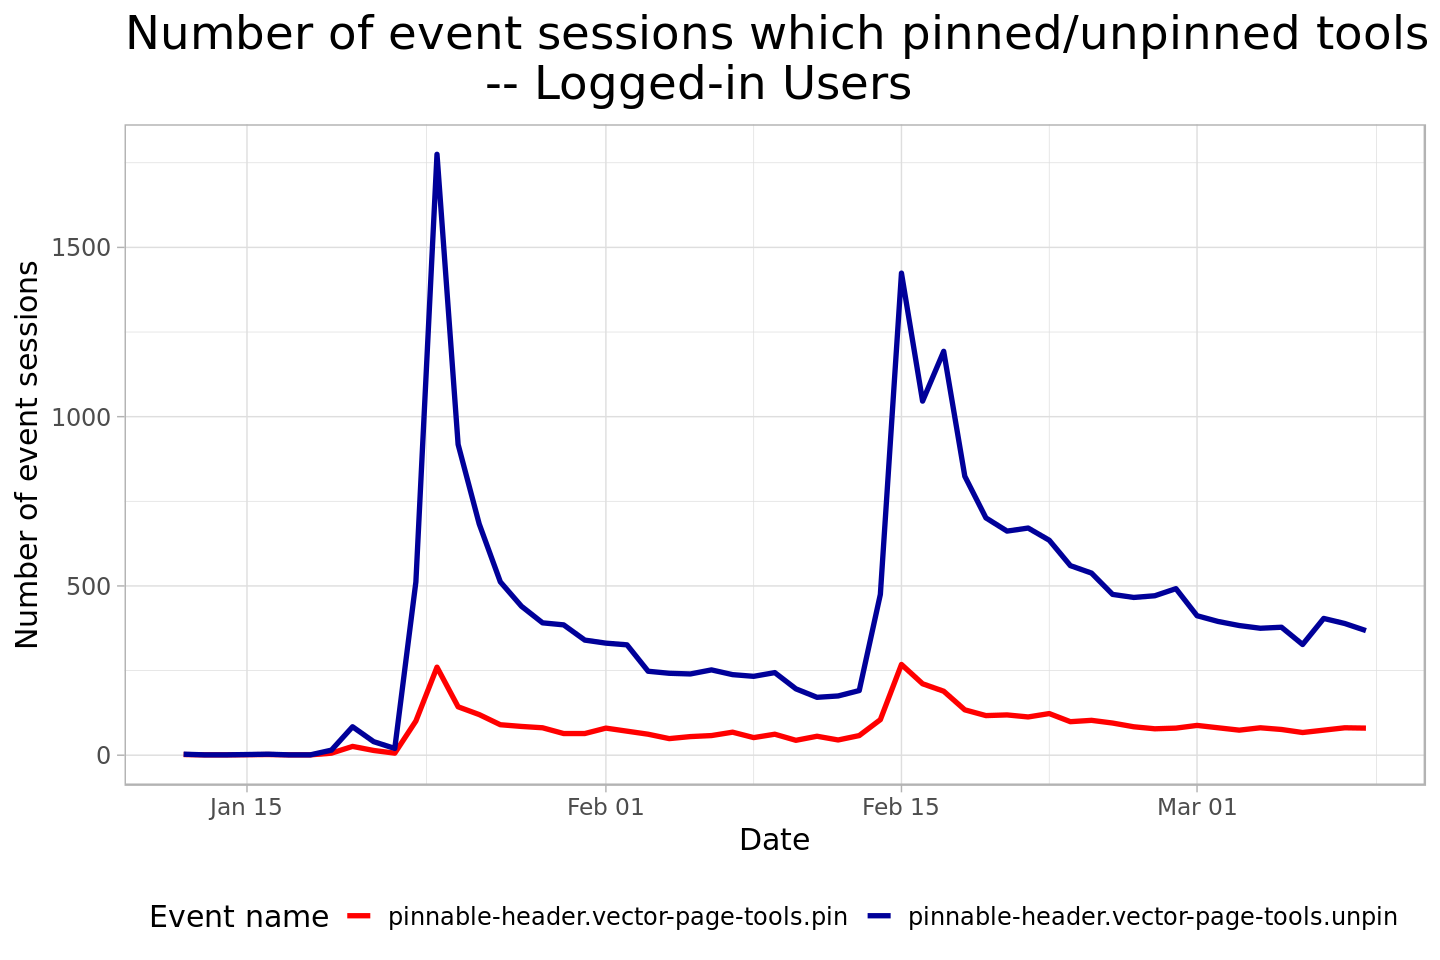

In [26]:
skin_daily_pin_login_g <- df_daily_pin %>%
   filter(is_anon=="false") %>%
   # exclude the recent incompleted day
   slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=event_tokens, color=event_name)) +
   geom_line( size = 1.5) +
  scale_color_manual(values= c("#FF0000", "#000099"), name = "Event name")  +
  labs(title = 'Number of event sessions which pinned/unpinned tools menu 
                        -- Logged-in Users',
     x = 'Date',
     y = 'Number of event sessions') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=28))
skin_daily_pin_login_g

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



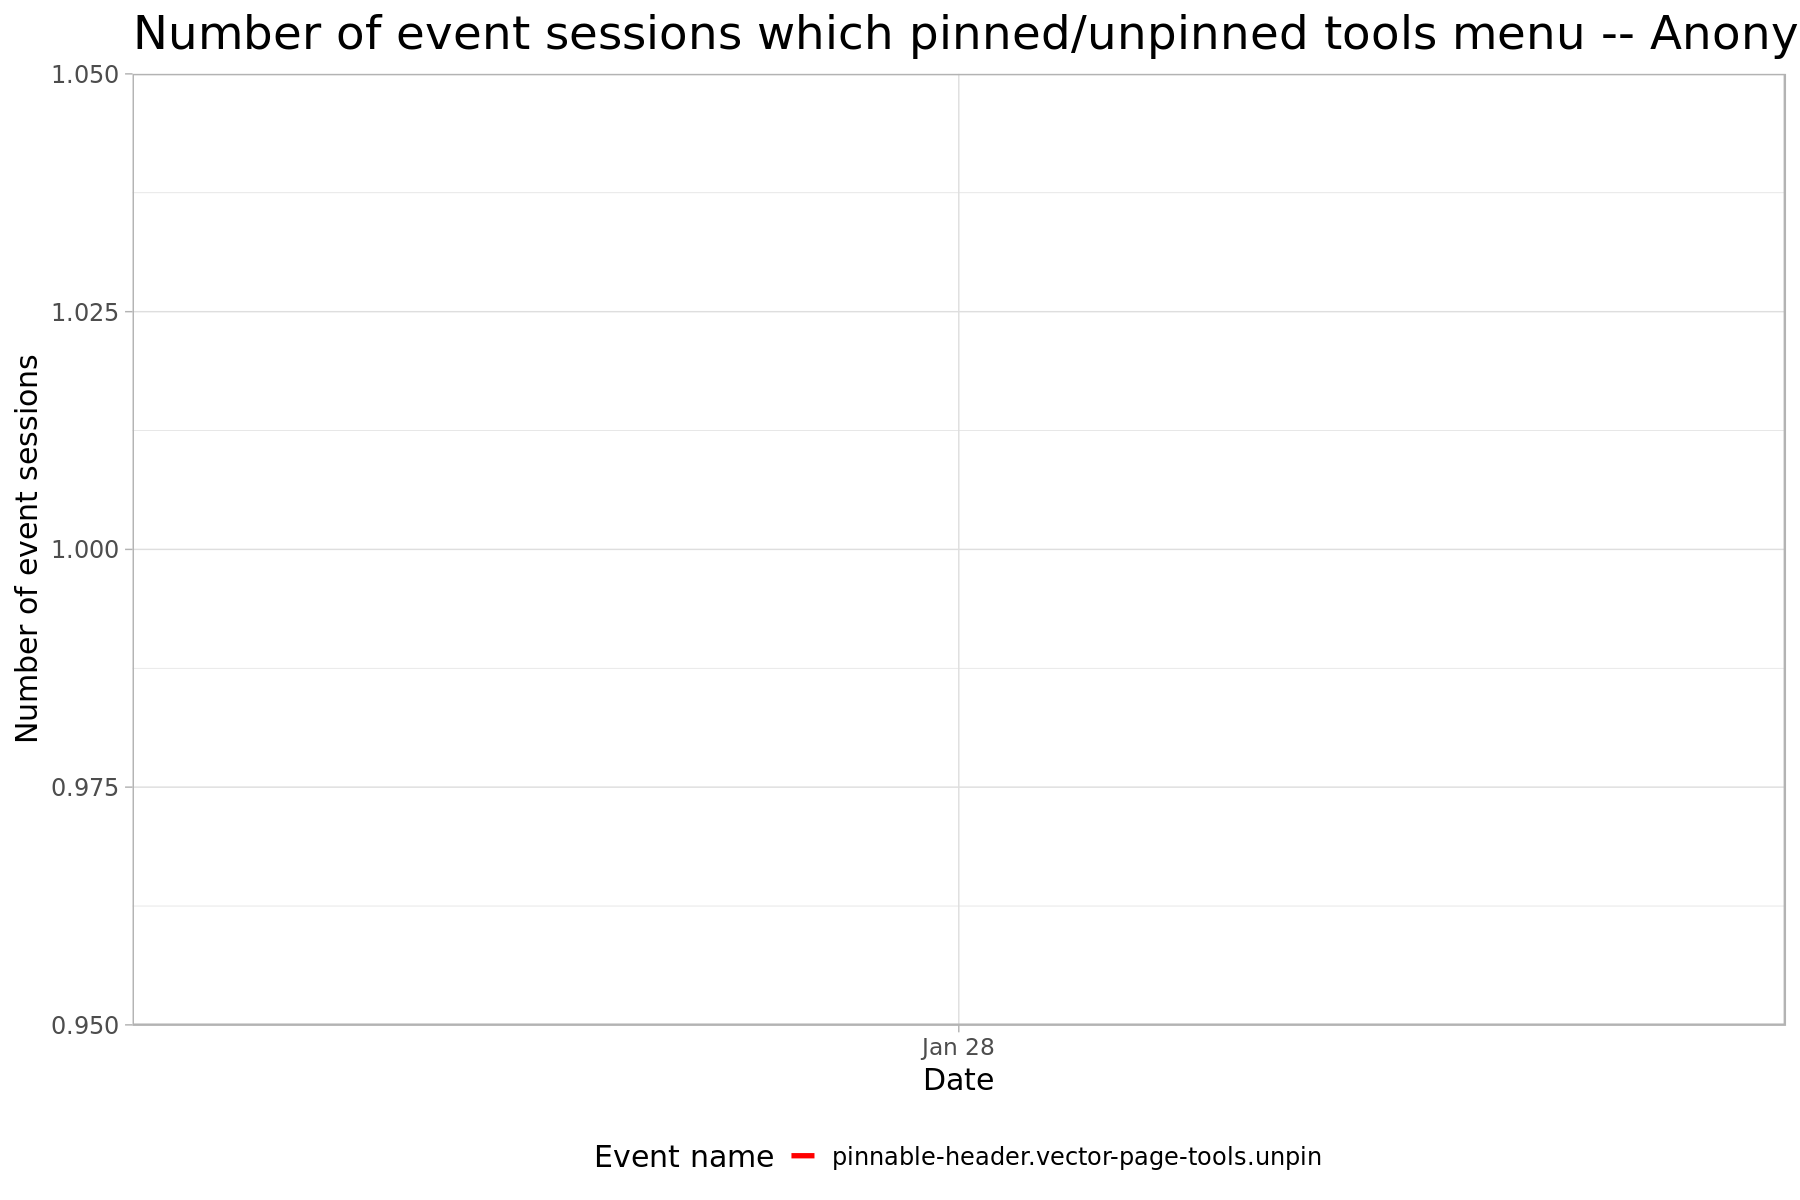

In [17]:
skin_daily_pin_anon_g <- df_daily_pin %>%
   filter(is_anon=="true") %>%
   # exclude the recent incompleted day
    slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=event_tokens, color=event_name)) +
   geom_line( size = 1.5) +
  scale_color_manual(values= c("#FF0000", "#000099"), name = "Event name")  +
  labs(title = 'Number of event sessions which pinned/unpinned tools menu -- Anonymous Users',
     x = 'Date',
     y = 'Number of event sessions') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=28))
skin_daily_pin_anon_g

In [18]:
df_daily_pin %>%
   filter(is_anon=="true") 

event_date,event_name,is_anon,event_tokens,clicks
<date>,<chr>,<chr>,<int>,<int>
2023-01-28,pinnable-header.vector-page-tools.unpin,true,1,1


In [23]:
df_daily_pin %>%
  filter(is_anon=='false') %>%
  select(event_date, event_name, clicks) %>%
  spread(key=event_name, value=clicks)

event_date,pinnable-header.vector-page-tools.pin,pinnable-header.vector-page-tools.unpin
<date>,<int>,<int>
2023-01-12,2,3
2023-01-13,1,2
2023-01-14,1,2
2023-01-16,5,4
2023-01-17,3,3
2023-01-18,1,2
2023-01-19,12,21
2023-01-20,54,126
2023-01-21,19,53


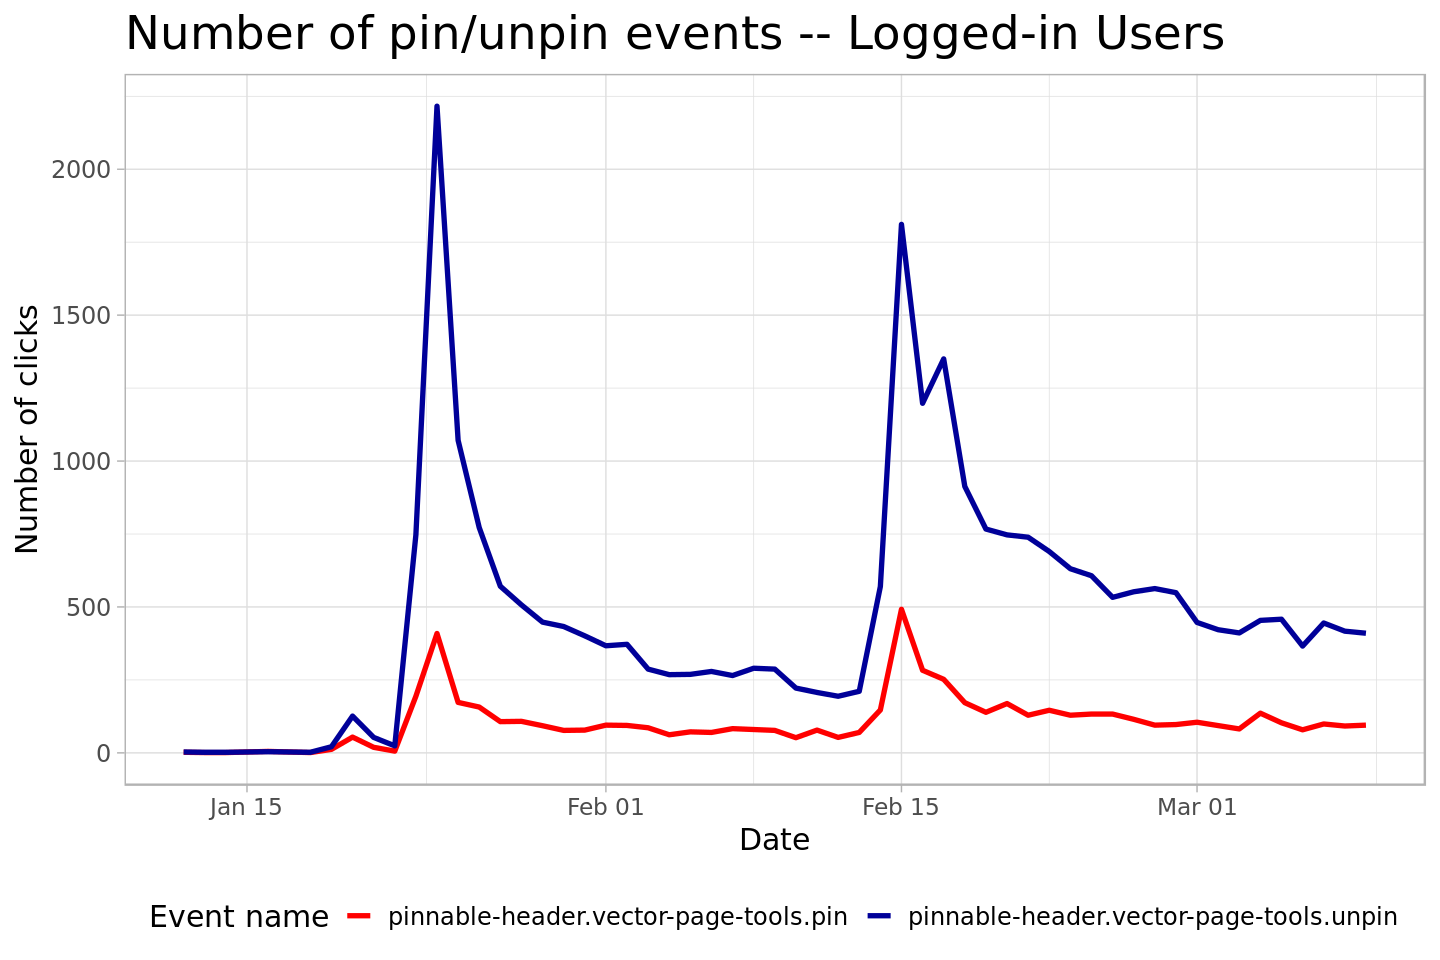

In [29]:
skin_daily_pin_click_login_g <- df_daily_pin %>%
   filter(is_anon=="false") %>%
   # exclude the recent incompleted day
   slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=clicks, color=event_name)) +
   geom_line( size = 1.5) +
  scale_color_manual(values= c("#FF0000", "#000099"), name = "Event name")  +
  labs(title = 'Number of pin/unpin events -- Logged-in Users',
     x = 'Date',
     y = 'Number of clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=28))
skin_daily_pin_click_login_g

### Note

- Pin/unpin events are logged for logged-in users, starting from 2023-01-12

- Pin/unpin events are NOT logged for anonymous users, despite there being one event recorded for an anonymous user on 2023-01-28 (dt":"2023-01-28T18:16:08.593Z","domain":"en.wikipedia.org) 

- Observed that there was more unpin events than pin events daily. Confirmed with WEB team that it is expected as the page tools are pinned on the right sidebar by default. User who has unpinned the tool 

## By user types ( logged-in and anonymous)

In [195]:
query_tool_pins_user_types <- "
select event.isAnon, event.skin, event.name,  COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND event.name IN (
-- To pin the page tool to the right sidebar
'pinnable-header.vector-page-tools.pin' ,
-- To unpin the page tool
 'pinnable-header.vector-page-tools.unpin'
) 
GROUP BY event.isAnon,  event.skin, event.name
"

In [196]:
df_tool_pins_user_types <- wmfdata::query_hive(query_tool_pins_user_types)

Don't forget to authenticate with Kerberos using kinit



In [197]:
df_tool_pins_user_types

isanon,skin,name,event_tokens,clicks
<chr>,<chr>,<chr>,<int>,<int>
false,vector-2022,pinnable-header.vector-page-tools.pin,4574,6605
false,vector-2022,pinnable-header.vector-page-tools.unpin,25384,29929
true,vector-2022,pinnable-header.vector-page-tools.unpin,1,1


### Note
Pin/unpin events are logged for loggedin users in vector-2022 skin correctly.

The only one event logged for anonymous users is from enwiki. It need be excluded from future analysis.
( 2023-01-28T18:16:08.593Z false,"isanon":true,"editcountbucket":"1-4 edits"). It should be a wrong data entry as anonymous users should be in `0 edits` bucket.


## By editing bucket

In [201]:
query_tool_pins_edit_bucket <- "
select event.editcountbucket, event.isAnon, event.skin, event.name,  COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND event.name IN (
-- To pin the page tool to the right sidebar
'pinnable-header.vector-page-tools.pin' ,
-- To unpin the page tool
 'pinnable-header.vector-page-tools.unpin'
) 
GROUP BY event.editcountbucket, event.isAnon,  event.skin, event.name
ORDER BY event.name
LIMIT 100000
"

In [202]:
df_tool_pins_edit_bucket <- wmfdata::query_hive(query_tool_pins_edit_bucket)

Don't forget to authenticate with Kerberos using kinit



In [203]:
df_tool_pins_edit_bucket

editcountbucket,isanon,skin,name,event_tokens,clicks
<chr>,<chr>,<chr>,<chr>,<int>,<int>
0 edits,false,vector-2022,pinnable-header.vector-page-tools.pin,795,965
5-99 edits,false,vector-2022,pinnable-header.vector-page-tools.pin,946,1177
1-4 edits,false,vector-2022,pinnable-header.vector-page-tools.pin,513,601
1000+ edits,false,vector-2022,pinnable-header.vector-page-tools.pin,1704,3018
100-999 edits,false,vector-2022,pinnable-header.vector-page-tools.pin,634,850
5-99 edits,false,vector-2022,pinnable-header.vector-page-tools.unpin,6041,6820
1-4 edits,true,vector-2022,pinnable-header.vector-page-tools.unpin,1,1
1-4 edits,false,vector-2022,pinnable-header.vector-page-tools.unpin,3100,3369
100-999 edits,false,vector-2022,pinnable-header.vector-page-tools.unpin,4171,4771


### Note
The editcountbucket info is logged as expected

# QA clicks on tools menu

## By wiki

In [47]:
query_tool_clicks <- "
SELECT wiki, event.skin, event.name AS event_name,  
REGEXP_EXTRACT(event.name, '^([-a-z]+)', 1) as link_name,
CASE WHEN event.name regexp '.unpinned$' THEN 'unpinned_tools' 
WHEN event.name regexp '.pinned$' THEN 'pinned_tools' 
ELSE 'old_tools' END AS tool_version,
COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND event.name IN 
(
't-whatlinkshere.vector-page-tools.unpinned', 't-whatlinkshere.vector-page-tools.pinned', 't-whatlinkshere',
't-recentchangeslinked.vector-page-tools.unpinned','t-recentchangeslinked.vector-page-tools.pinned','t-recentchangeslinked',
't-specialpages.vector-page-tools.unpinned','t-specialpages.vector-page-tools.pinned','t-specialpages',
't-permalink.vector-page-tools.unpinned','t-permalink-page-tools.vector-page-tools.pinned','t-permalink-page-tools',
't-info.vector-page-tools.unpinned','t-info.vector-page-tools.vector-page-tools.pinned','t-info',
't-cite.vector-page-tools.unpinned','t-cite.vector-page-tools.pinned','t-cite',
't-wikibase.vector-page-tools.unpinned','t-wikibase.vector-page-tools.pinned','t-wikibase',
't-whowrotethat.vector-page-tools.unpinned','t-whowrotethat.vector-page-tools.pinned','t-whowrotethat',
'ca-delete.vector-page-tools.unpinned','ca-delete.vector-page-tools.pinned','ca-delete',
'ca-move.vector-page-tools.unpinned','ca-move.vector-page-tools.pinned','ca-move',
'ca-unprotect.vector-page-tools.unpinned','ca-unprotect.vector-page-tools.pinned','ca-unprotect',
'coll-download-as-rl.vector-page-tools.unpinned','coll-download-as-rl.vector-page-tools.pinned','coll-download-as-rl',
't-print.vector-page-tools.unpinned','t-print.vector-page-tools.pinned','t-print'
)
GROUP BY wiki, event.skin, event.name,
REGEXP_EXTRACT(event.name,'^([-a-z]+)', 1) ,
CASE WHEN event.name regexp '.unpinned$' THEN 'unpinned_tools' 
WHEN event.name regexp '.pinned$' THEN 'pinned_tools' 
ELSE 'old_tools' END
"

In [48]:

df_tool_clicks <- wmfdata::query_hive(query_tool_clicks)

Don't forget to authenticate with Kerberos using kinit



In [49]:
df_tool_clicks 

wiki,skin,event_name,link_name,tool_version,event_tokens,clicks
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
arywiki,vector-2022,t-specialpages.vector-page-tools.unpinned,t-specialpages,unpinned_tools,7,10
bnwiki,vector,ca-move,ca-move,old_tools,253,903
frwiktionary,vector-2022,t-whatlinkshere.vector-page-tools.pinned,t-whatlinkshere,pinned_tools,48,197
nnwiki,vector,t-cite,t-cite,old_tools,1,2
dawiki,vector-2022,ca-unprotect.vector-page-tools.pinned,ca-unprotect,pinned_tools,1,1
eswikiquote,vector,t-whatlinkshere,t-whatlinkshere,old_tools,62,208
fowiki,vector-2022,t-recentchangeslinked,t-recentchangeslinked,old_tools,1,1
fywiki,vector-2022,t-wikibase.vector-page-tools.unpinned,t-wikibase,unpinned_tools,2,17
mywiki,vector-2022,t-info,t-info,old_tools,44,94


In [226]:
 unique(df_tool_clicks$wiki)

[1] "arywiki"              "bnwiki"               "frwiktionary"        
  [4] "nnwiki"               "dawiki"               "eswikiquote"         
  [7] "fowiki"               "fywiki"               "mywiki"              
 [10] "nowikibooks"          "trwiki"               "zh_yuewiki"          
 [13] "arcwiki"              "eswikisource"         "frwikisource"        
 [16] "gnwiki"               "plwikibooks"          "urwiki"              
 [19] "azwikibooks"          "dawikibooks"          "dewiki"              
 [22] "frwiki"               "kaawiki"              "ltwikiquote"         
 [25] "scowiki"              "uzwiki"               "azwikiquote"         
 [28] "elwiki"               "hiwiktionary"         "itwiki"              
 [31] "madwiki"              "oswiki"               "pdcwiki"             
 [34] "testwiki"             "ugwiki"               "wuuwiki"             
 [37] "zhwiki"               "dewikisource"         "dewikivoyage"        
 [40] "enwikivoyage"         "guwwikiquote"         "knwiki"              
 [43] "kswiki"               "mniwiki"              "ruwiki"              
 [46] "uawikimedia"          "bewiki"               "dzwiki"              
 [49] "etwiki"               "labswiki"             "lbwiki"              
 [52] "mnwwiki"              "siwiki"               "eswiktionary"        
 [55] "guwiki"               "huwiki"               "plwikimedia"         
 [58] "swwiki"               "banwiki"              "bhwiki"              
 [61] "eowiki"               "fawiki"               "gawiki"              
 [64] "hewikisource"         "lvwiki"               "ptwikibooks"         
 [67] "sdwiki"               "thwikisource"         "arwiktionary"        
 [70] "bgwiktionary"         "bxrwiki"              "fiwiki"              
 [73] "hiwiki"               "lmowiki"              "minwiki"             
 [76] "mswiki"               "ocwiki"               "tlwiki"              
 [79] "trwikimedia"          "zhwikivoyage"         "angwiktionary"       
 [82] "commonswiki"          "cowiki"               "glkwiki"             
 [85] "jawikivoyage"         "kawiki"               "nowiki"              
 [88] "orwiki"               "szlwiki"              "extwiki"             
 [91] "hywwiki"              "iowiktionary"         "iswiki"              
 [94] "jawiki"               "mkwiki"               "pawiki"              
 [97] "shwiki"               "trwiktionary"         "zhwikinews"          
[100] "bgwiki"               "cvwiki"               "eswiki"              
[103] "lijwiki"              "ltwiki"               "nahwiki"             
[106] "arwikisource"         "aswiki"               "bgwikiquote"         
[109] "brwiki"               "ckbwiki"              "idwikibooks"         
[112] "klwiki"               "kmwiki"               "kywiki"              
[115] "mnwiki"               "rowiki"               "crwiki"              
[118] "enwiki"               "frwikivoyage"         "mnwwiktionary"       
[121] "nlwiki"               "scwiki"               "trwikibooks"         
[124] "afwiktionary"         "anwiki"               "cawikiquote"         
[127] "hewiki"               "mhrwiki"              "rwwiki"              
[130] "sqwiki"               "tgwiki"               "idwiki"              
[133] "jawikisource"         "kvwiki"               "pntwiki"             
[136] "srwiki"               "stwiktionary"         "cewiki"              
[139] "dkwikimedia"          "frpwiki"              "gvwiki"              
[142] "mtwiki"               "plwiki"               "taywiki"             
[145] "ttwiki"               "bnwikisource"         "frwikiquote"         
[148] "itwiktionary"         "mediawikiwiki"        "tawiki"              
[151] "elwikisource"         "fawiktionary"         "ffwiki"              
[154] "kowiktionary"         "nqowiki"              "ptwiki"              
[157] "bawiki"               "cawikisource"         "cebwiki"             
[160] "hewikiquote"        

In [227]:
length( unique(df_tool_clicks$wiki))

[1] 719

In [54]:
df_tool_clicks_enwiki <- df_tool_clicks[order(-df_tool_clicks $event_tokens),] %>%
 filter(wiki=='enwiki') 

In [55]:
head(df_tool_clicks_enwiki)
  

,wiki,skin,event_name,link_name,tool_version,event_tokens,clicks
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,enwiki,vector,t-whatlinkshere,t-whatlinkshere,old_tools,17549,83679
2,enwiki,vector-2022,t-whatlinkshere.vector-page-tools.pinned,t-whatlinkshere,pinned_tools,11641,32562
3,enwiki,vector,t-wikibase,t-wikibase,old_tools,10531,37949
4,enwiki,vector-2022,coll-download-as-rl.vector-page-tools.pinned,coll-download-as-rl,pinned_tools,10511,30693
5,enwiki,vector-2022,t-wikibase.vector-page-tools.pinned,t-wikibase,pinned_tools,8400,24646
6,enwiki,vector,t-info,t-info,old_tools,8157,32262


In [58]:
df_tool_clicks_enwiki %>%
  select(skin, link_name, tool_version, clicks) %>%
  spread(key=tool_version, value=clicks, fill=0)

skin,link_name,old_tools,pinned_tools,unpinned_tools
<chr>,<chr>,<dbl>,<dbl>,<dbl>
vector,ca-delete,4404,0,0
vector,ca-move,16241,0,0
vector,ca-unprotect,183,0,0
vector,coll-download-as-rl,21004,0,0
vector,t-cite,972,0,0
vector,t-info,32262,0,0
vector,t-print,2371,0,0
vector,t-recentchangeslinked,18051,0,0
vector,t-specialpages,3225,0,0


### Note

-  As of March 14th,  schema logged tool click events from 719 wikis.

- Following 12 tool links have click events logged for three loations: left sidebar (vector), right sidebar(vector2022 default), unpinned tool menu ( vector 2022). 
`What links here`, 
`Related changes`, 
`Special pages`, 
`Permanent link`, 
`Page information`, 
`Cite this page`, 
`Wikidata item`, 
`Delete`, 
`Move`, 
`Change protection`, 
`Download as PDF`, 
`Printable version`.



- Following tool links under `In other projects` DON'T have click events logged in schema. Have confirmed with Olga that it's expected. The links are
`Wikimedia Commons`,
`Wikibooks`,
`Wikinews`,
`Wikiquote`,
`Wikisource`,
`Wikiversity`,
`Wikivoyage`.


- Following 1 tool link DON'T have click events logged in schema, need to check with WEB team. The link is
`Who Wrote That`

- Discovered events with event.name for old tool links were logged in both vector and vector2022. Old tool links should only be avaiable in vector skin. Need to check with WEB team.

## Daily trend

In [61]:
query_daily_clicks <- "
SELECT TO_DATE(meta.dt) AS event_date,  
REGEXP_EXTRACT(event.name, '^([-a-z]+)', 1) as link_name,
CASE WHEN event.name regexp '.unpinned$' THEN 'unpinned_tools' 
WHEN event.name regexp '.pinned$' THEN 'pinned_tools' 
END AS tool_location,
COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND event.name IN 
(
't-whatlinkshere.vector-page-tools.unpinned', 't-whatlinkshere.vector-page-tools.pinned',
't-recentchangeslinked.vector-page-tools.unpinned','t-recentchangeslinked.vector-page-tools.pinned',
't-specialpages.vector-page-tools.unpinned', 't-specialpages.vector-page-tools.pinned',
't-permalink.vector-page-tools.unpinned', 't-permalink-page-tools.vector-page-tools.pinned',
't-info.vector-page-tools.unpinned', 't-info.vector-page-tools.vector-page-tools.pinned',
't-cite.vector-page-tools.unpinned', 't-cite.vector-page-tools.pinned',
't-wikibase.vector-page-tools.unpinned', 't-wikibase.vector-page-tools.pinned',
't-whowrotethat.vector-page-tools.unpinned', 't-whowrotethat.vector-page-tools.pinned',
'ca-delete.vector-page-tools.unpinned','ca-delete.vector-page-tools.pinned',
'ca-move.vector-page-tools.unpinned', 'ca-move.vector-page-tools.pinned',
'ca-unprotect.vector-page-tools.unpinned', 'ca-unprotect.vector-page-tools.pinned',
'coll-download-as-rl.vector-page-tools.unpinned', 'coll-download-as-rl.vector-page-tools.pinned',
't-print.vector-page-tools.unpinned', 't-print.vector-page-tools.pinned'
)
AND event.skin='vector-2022'
GROUP BY TO_DATE(meta.dt), REGEXP_EXTRACT(event.name, '^([-a-z]+)', 1) ,
CASE WHEN event.name regexp '.unpinned$' THEN 'unpinned_tools' 
WHEN event.name regexp '.pinned$' THEN 'pinned_tools' 
END 
"

In [62]:
df_daily_clicks <- wmfdata::query_hive(query_daily_clicks )

Don't forget to authenticate with Kerberos using kinit



In [63]:
df_daily_clicks$event_date <- as.Date(df_daily_clicks$event_date)

In [64]:
df_daily_clicks

event_date,link_name,tool_location,event_tokens,clicks
<date>,<chr>,<chr>,<int>,<int>
2023-02-17,coll-download-as-rl,unpinned_tools,24,204
2023-01-28,t-whatlinkshere,pinned_tools,268,569
2023-02-09,coll-download-as-rl,pinned_tools,214,420
2023-03-12,ca-move,unpinned_tools,145,245
2023-01-29,t-wikibase,pinned_tools,235,433
2023-02-17,ca-delete,unpinned_tools,43,100
2023-03-04,ca-move,pinned_tools,203,428
2023-02-05,t-info,unpinned_tools,42,69
2023-03-08,t-print,unpinned_tools,108,150


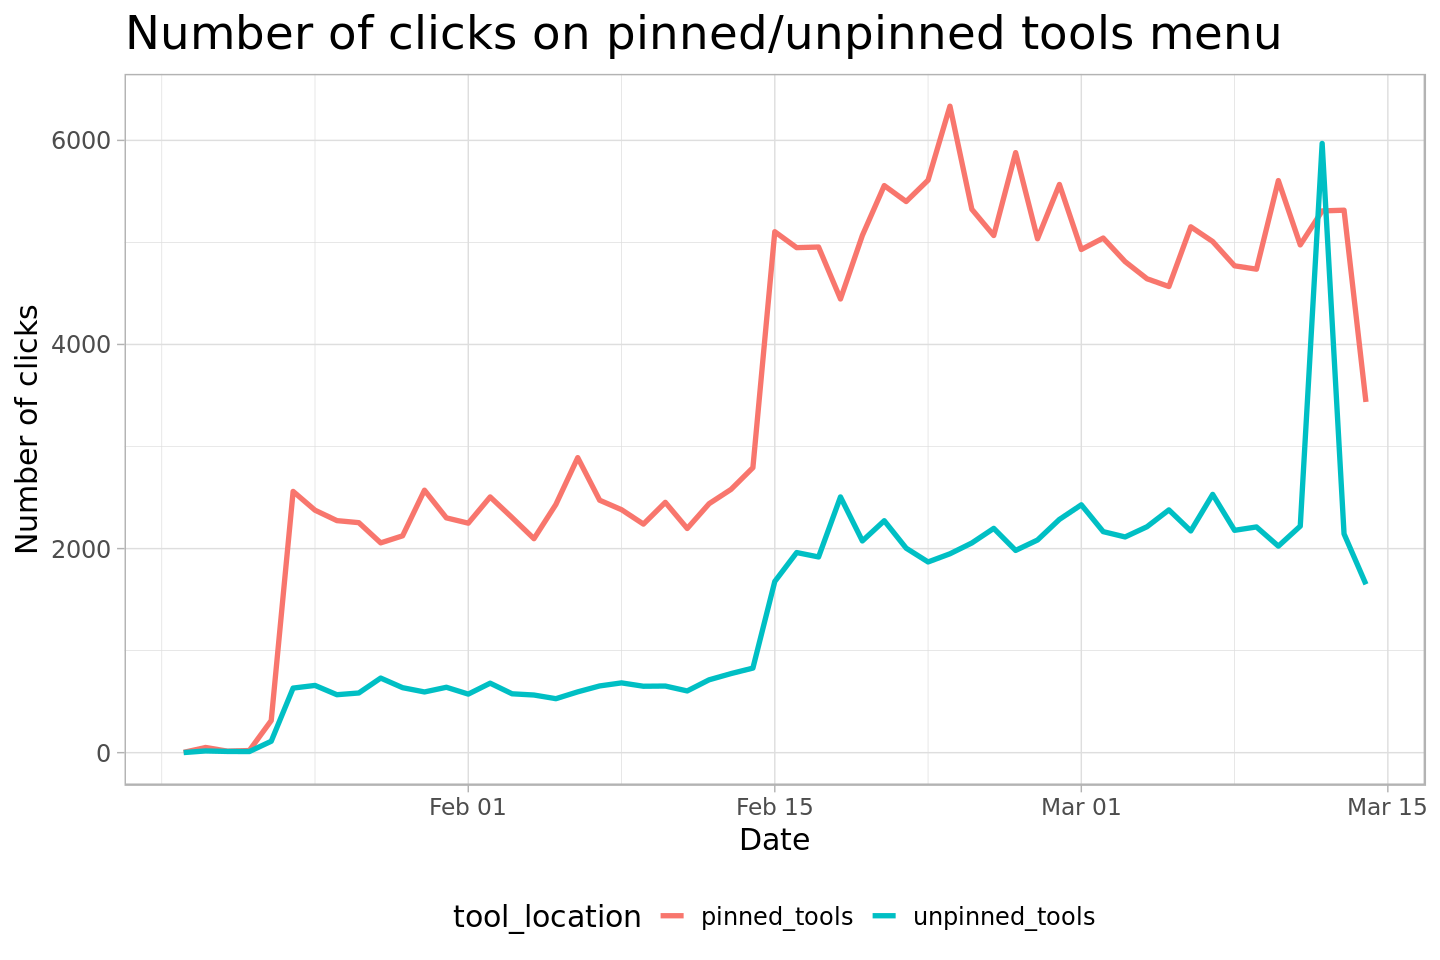

In [68]:
skin_daily_click_g <- df_daily_clicks %>%
   group_by(event_date, tool_location ) %>%
   summarize(total_clicks=sum(clicks), .groups='drop') %>%
   # exclude the recent incompleted day
   # slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=total_clicks, color=tool_location)) +
   geom_line( size = 1.5) +
  labs(title = 'Number of clicks on pinned/unpinned tools menu ',
     x = 'Date',
     y = 'Number of clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=28))
skin_daily_click_g

In [71]:
df_daily_clicks %>%
   filter(tool_location=='pinned_tools') %>%
   head(5)

,event_date,link_name,tool_location,event_tokens,clicks
,<date>,<chr>,<chr>,<int>,<int>
1,2023-01-28,t-whatlinkshere,pinned_tools,268,569
2,2023-02-09,coll-download-as-rl,pinned_tools,214,420
3,2023-01-29,t-wikibase,pinned_tools,235,433
4,2023-03-04,ca-move,pinned_tools,203,428
5,2023-03-05,t-cite,pinned_tools,56,75


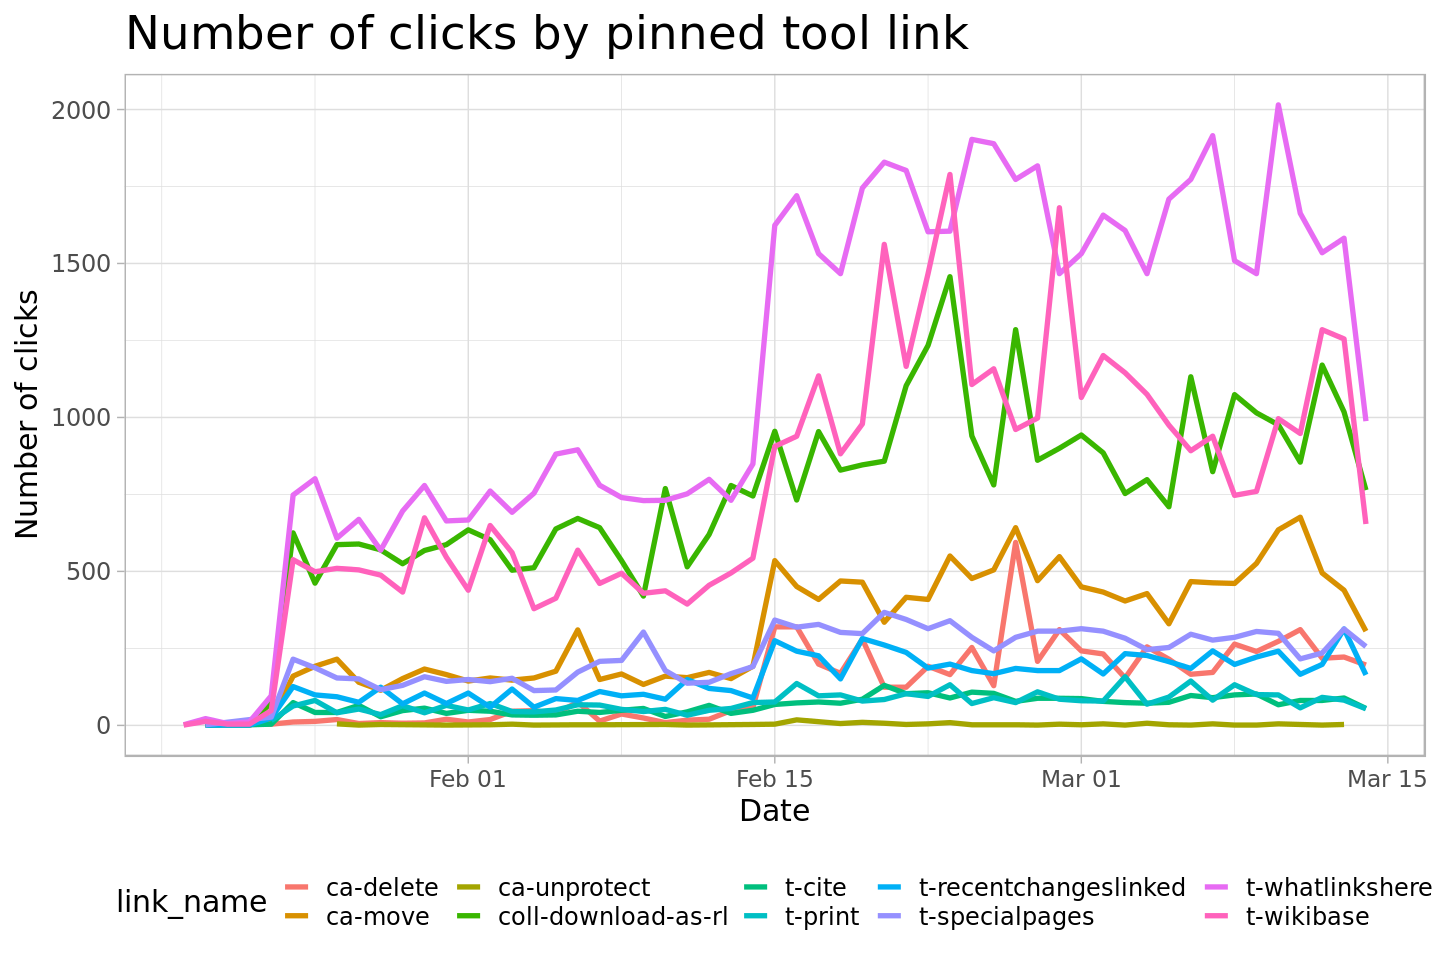

In [73]:
skin_daily_click_pin_g <- df_daily_clicks %>%
   filter(tool_location=='pinned_tools') %>%
   # exclude the recent incompleted day
   # slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=clicks, color=link_name)) +
   geom_line( size = 1.5) +
  labs(title = 'Number of clicks by pinned tool link ',
     x = 'Date',
     y = 'Number of clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=28))
skin_daily_click_pin_g

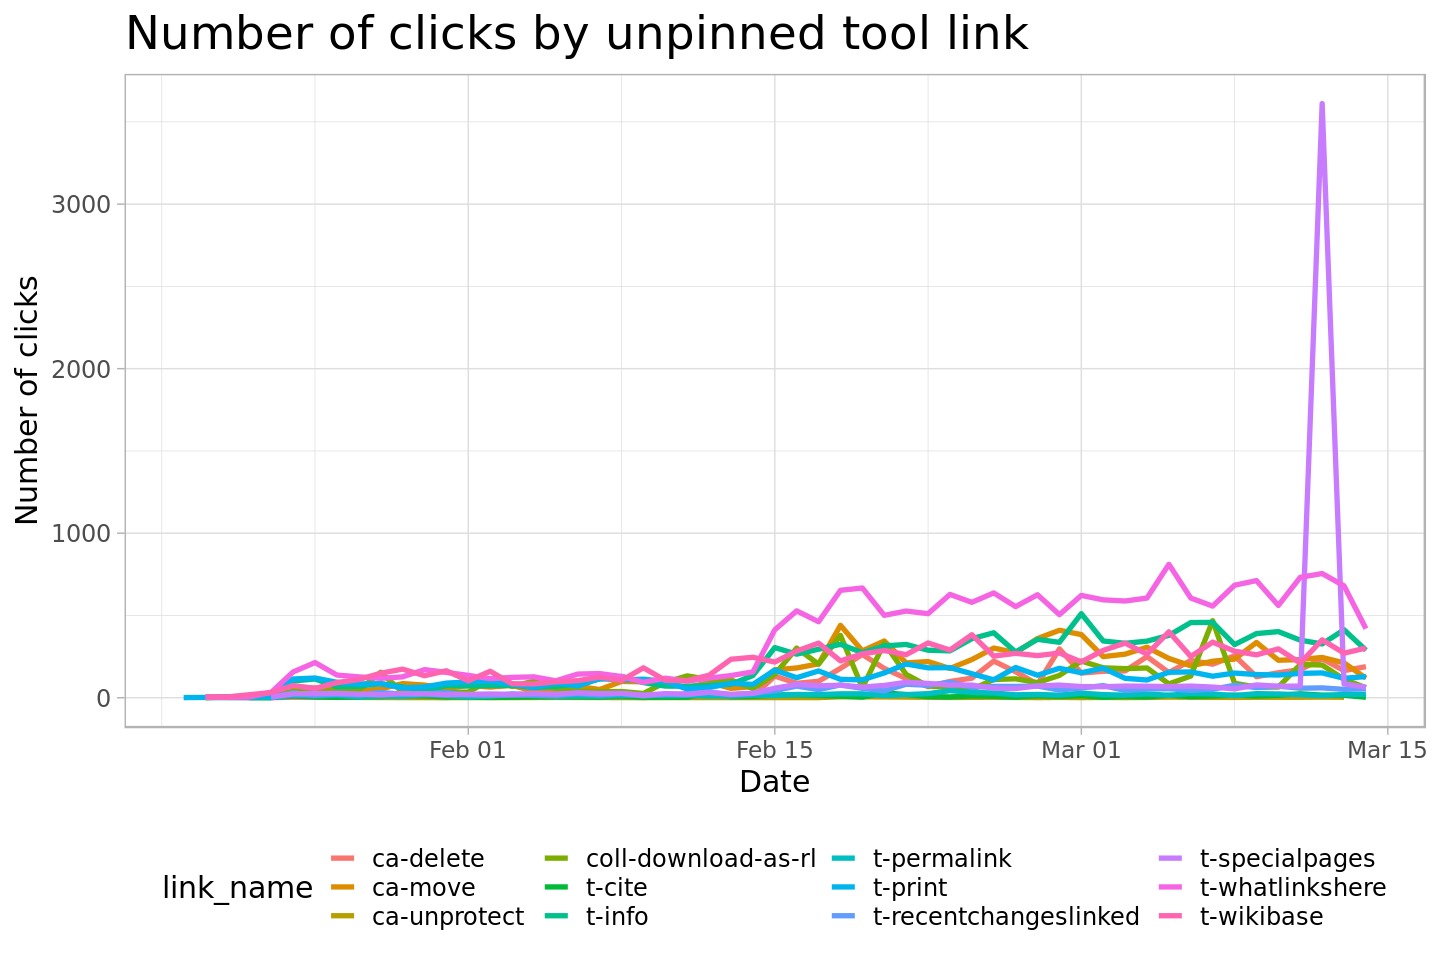

In [74]:
skin_daily_click_unpin_g <- df_daily_clicks %>%
   filter(tool_location=='unpinned_tools') %>%
   # exclude the recent incompleted day
   # slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=clicks, color=link_name)) +
   geom_line( size = 1.5) +
  labs(title = 'Number of clicks by unpinned tool link ',
     x = 'Date',
     y = 'Number of clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=28))
skin_daily_click_unpin_g

In [82]:
df_daily_clicks %>%
   filter(tool_location=='unpinned_tools' & link_name=='t-specialpages')  %>%
   arrange(event_date)
   

event_date,link_name,tool_location,event_tokens,clicks
<date>,<chr>,<chr>,<int>,<int>
2023-01-23,t-specialpages,unpinned_tools,5,5
2023-01-24,t-specialpages,unpinned_tools,18,23
2023-01-25,t-specialpages,unpinned_tools,23,26
2023-01-26,t-specialpages,unpinned_tools,24,27
2023-01-27,t-specialpages,unpinned_tools,21,22
2023-01-28,t-specialpages,unpinned_tools,15,18
2023-01-29,t-specialpages,unpinned_tools,22,25
2023-01-30,t-specialpages,unpinned_tools,16,24
2023-01-31,t-specialpages,unpinned_tools,13,18


### Note

- Start to recieve pin/unpin tools menue events since 2023-01-19.

- Start to recieve clicks on tools menu events since 2023-01-17. 

- There is a spike of clicks on unpinned `t-specialpages` link on 2023-03-12. The number of sessions on  2023-03-12 is normal. 

## By editing bucket

In [208]:
query_clicks_editbucket <- "
SELECT event.editcountbucket  ,  
REGEXP_EXTRACT(event.name, '^([-a-z]+)', 1) as link_name,
CASE WHEN event.name regexp '.unpinned$' THEN 'unpinned_tools' 
WHEN event.name regexp '.pinned$' THEN 'pinned_tools' 
END AS tool_location,
COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND event.name IN 
(
't-whatlinkshere.vector-page-tools.unpinned', 't-whatlinkshere.vector-page-tools.pinned',
't-recentchangeslinked.vector-page-tools.unpinned','t-recentchangeslinked.vector-page-tools.pinned',
't-specialpages.vector-page-tools.unpinned', 't-specialpages.vector-page-tools.pinned',
't-permalink.vector-page-tools.unpinned', 't-permalink-page-tools.vector-page-tools.pinned',
't-info.vector-page-tools.unpinned', 't-info.vector-page-tools.vector-page-tools.pinned',
't-cite.vector-page-tools.unpinned', 't-cite.vector-page-tools.pinned',
't-wikibase.vector-page-tools.unpinned', 't-wikibase.vector-page-tools.pinned',
't-whowrotethat.vector-page-tools.unpinned', 't-whowrotethat.vector-page-tools.pinned',
'ca-delete.vector-page-tools.unpinned','ca-delete.vector-page-tools.pinned',
'ca-move.vector-page-tools.unpinned', 'ca-move.vector-page-tools.pinned',
'ca-unprotect.vector-page-tools.unpinned', 'ca-unprotect.vector-page-tools.pinned',
'coll-download-as-rl.vector-page-tools.unpinned', 'coll-download-as-rl.vector-page-tools.pinned',
't-print.vector-page-tools.unpinned', 't-print.vector-page-tools.pinned'
)
AND event.skin='vector-2022'
GROUP BY event.editcountbucket, REGEXP_EXTRACT(event.name, '^([-a-z]+)', 1) ,
CASE WHEN event.name regexp '.unpinned$' THEN 'unpinned_tools' 
WHEN event.name regexp '.pinned$' THEN 'pinned_tools' 
END 
ORDER BY tool_location, event.editcountbucket, link_name
LIMIT 1000000
"

In [209]:
df_clicks_editbucket  <- wmfdata::query_hive(query_clicks_editbucket)

Don't forget to authenticate with Kerberos using kinit



In [210]:
df_clicks_editbucket 

editcountbucket,link_name,tool_location,event_tokens,clicks
<chr>,<chr>,<chr>,<int>,<int>
0 edits,ca-delete,pinned_tools,19,28
0 edits,ca-move,pinned_tools,104,115
0 edits,coll-download-as-rl,pinned_tools,8308,27763
0 edits,t-cite,pinned_tools,935,1245
0 edits,t-print,pinned_tools,1209,2174
0 edits,t-recentchangeslinked,pinned_tools,890,999
0 edits,t-specialpages,pinned_tools,3778,4594
0 edits,t-whatlinkshere,pinned_tools,3375,4036
0 edits,t-wikibase,pinned_tools,1606,4246


In [217]:
df_clicks_editbucket %>%
  filter(tool_location=='unpinned_tools') %>%
  select(editcountbucket, tool_location,link_name, clicks) %>%
  spread(key=editcountbucket, value=clicks, fill=0)

tool_location,link_name,0 edits,1-4 edits,100-999 edits,1000+ edits,5-99 edits
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
unpinned_tools,ca-delete,1,1,46,5314,0
unpinned_tools,ca-move,11,19,902,7538,749
unpinned_tools,ca-unprotect,0,0,0,67,1
unpinned_tools,coll-download-as-rl,3751,1411,399,135,583
unpinned_tools,t-cite,153,43,47,152,106
unpinned_tools,t-info,366,456,2210,8190,1050
unpinned_tools,t-permalink,151,135,197,176,239
unpinned_tools,t-print,3055,1141,503,306,1350
unpinned_tools,t-recentchangeslinked,219,111,214,1651,138


In [218]:
df_clicks_editbucket %>%
  filter(tool_location=='pinned_tools') %>%
  select(editcountbucket, tool_location,link_name, clicks) %>%
  spread(key=editcountbucket, value=clicks, fill=0)

tool_location,link_name,0 edits,1-4 edits,100-999 edits,1000+ edits,5-99 edits
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pinned_tools,ca-delete,28,23,41,7640,44
pinned_tools,ca-move,115,219,3027,10082,4475
pinned_tools,ca-unprotect,0,0,3,138,2
pinned_tools,coll-download-as-rl,27763,5211,2727,917,5816
pinned_tools,t-cite,1245,549,415,401,990
pinned_tools,t-print,2174,482,322,384,671
pinned_tools,t-recentchangeslinked,999,873,614,4828,1215
pinned_tools,t-specialpages,4594,2355,983,1817,2757
pinned_tools,t-whatlinkshere,4036,3190,5905,47087,5257


### Note
Editing bucket is logged as expected

# QA old tool events by user types ( logged-in and anonymous)

In [123]:
query_daily_clicks_old_link_enwiki <- "
SELECT TO_DATE(meta.dt) as event_date, event.skin , event.isAnon AS is_anon,  event.name, 
COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND event.name IN 
(
't-whatlinkshere',
't-recentchangeslinked',
't-specialpages',
't-permalink-page-tools',
't-info',
't-cite',
't-wikibase',
't-whowrotethat',
'ca-delete',
'ca-move',
'ca-unprotect',
'coll-download-as-rl',
't-print'
)
AND wiki='enwiki'
GROUP BY TO_DATE(meta.dt),event.skin , event.isAnon, event.name
"

In [125]:
df_daily_clicks_old_link_enwiki <- wmfdata::query_hive(query_daily_clicks_old_link_enwiki)

Don't forget to authenticate with Kerberos using kinit



In [126]:
df_daily_clicks_old_link_enwiki$event_date <- as.Date(df_daily_clicks_old_link_enwiki$event_date)

In [171]:
df_daily_clicks_old_link_enwiki %>%
  arrange(event_date)

event_date,skin,is_anon,name,event_tokens,clicks
<date>,<chr>,<chr>,<chr>,<int>,<int>
2023-01-01,vector,false,t-recentchangeslinked,70,343
2023-01-01,vector,false,ca-delete,15,46
2023-01-01,vector-2022,false,t-cite,1,2
2023-01-01,vector,false,t-cite,11,11
2023-01-01,vector-2022,false,ca-move,15,24
2023-01-01,vector,false,ca-move,182,261
2023-01-01,vector-2022,false,t-specialpages,8,9
2023-01-01,vector,false,ca-unprotect,2,2
2023-01-01,vector-2022,false,t-wikibase,61,171


In [170]:
df_daily_clicks_old_link_enwiki %>%
  filter(event_date>='2023-02-19') %>%
  group_by( is_anon,skin) %>%
  summarize(sum_clicks=sum(clicks),.groups='drop')

is_anon,skin,sum_clicks
<chr>,<chr>,<int>
false,vector,60508
true,vector,3
true,vector-2022,3429


## Logged-in Users

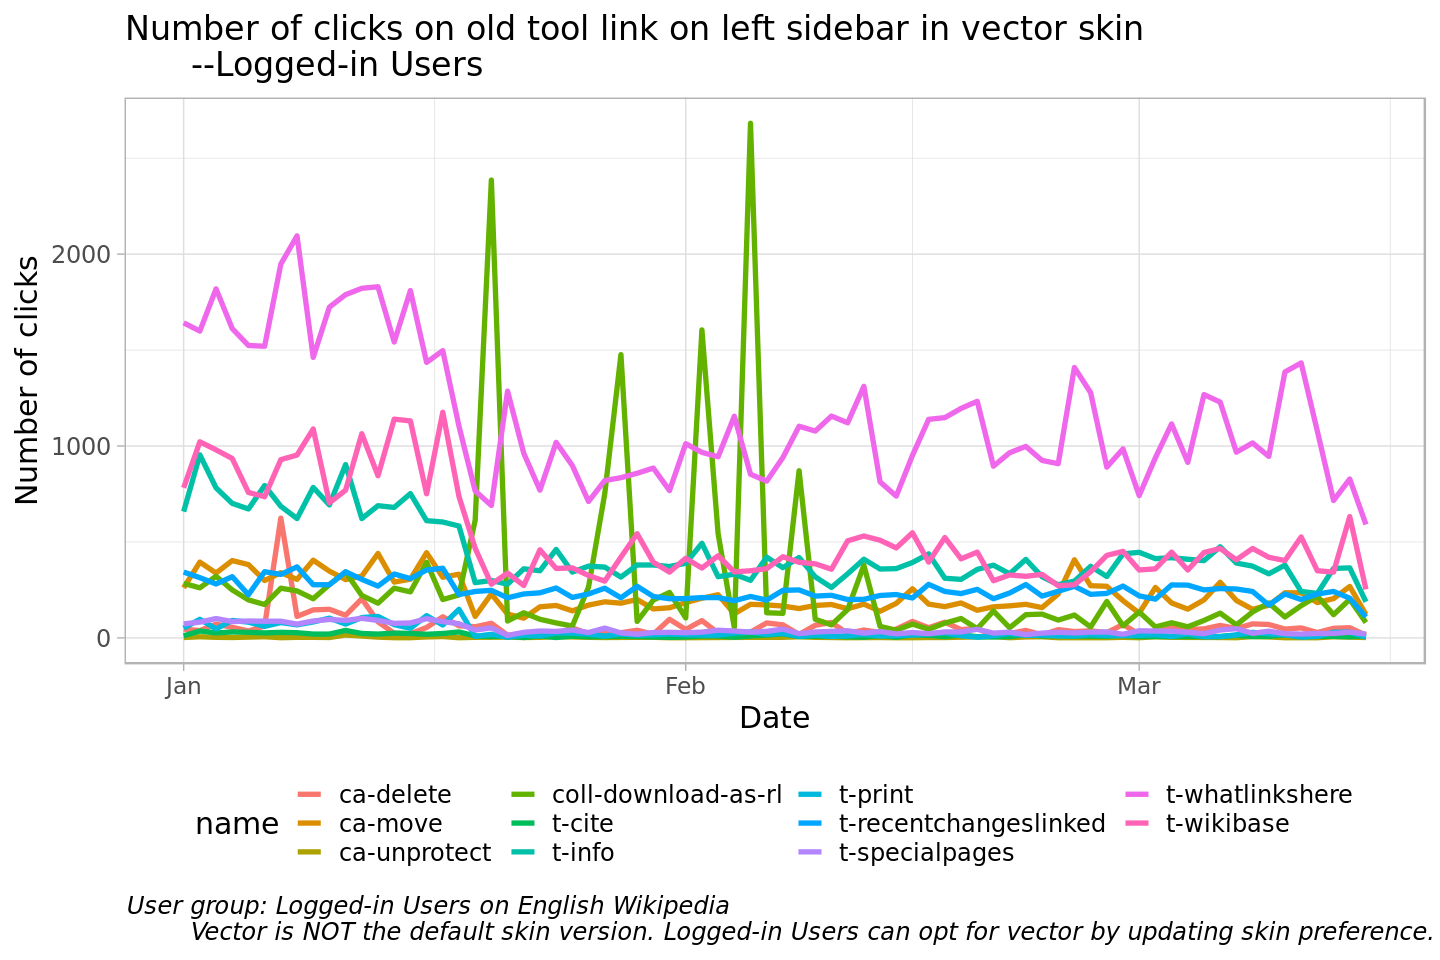

In [183]:
skin_daily_click_old_link_vector_login_g <- df_daily_clicks_old_link_enwiki %>%
   filter(skin=='vector'& is_anon=='false') %>%
   # exclude the recent incompleted day
   # slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=clicks, color=name)) +
   geom_line( size = 1.5) +
  labs(title = 'Number of clicks on old tool link on left sidebar in vector skin
      --Logged-in Users ',
     x = 'Date',
     y = 'Number of clicks',
      caption = 'User group: Logged-in Users on English Wikipedia
        Vector is NOT the default skin version. Logged-in Users can opt for vector by updating skin preference.') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=20))
skin_daily_click_old_link_vector_login_g

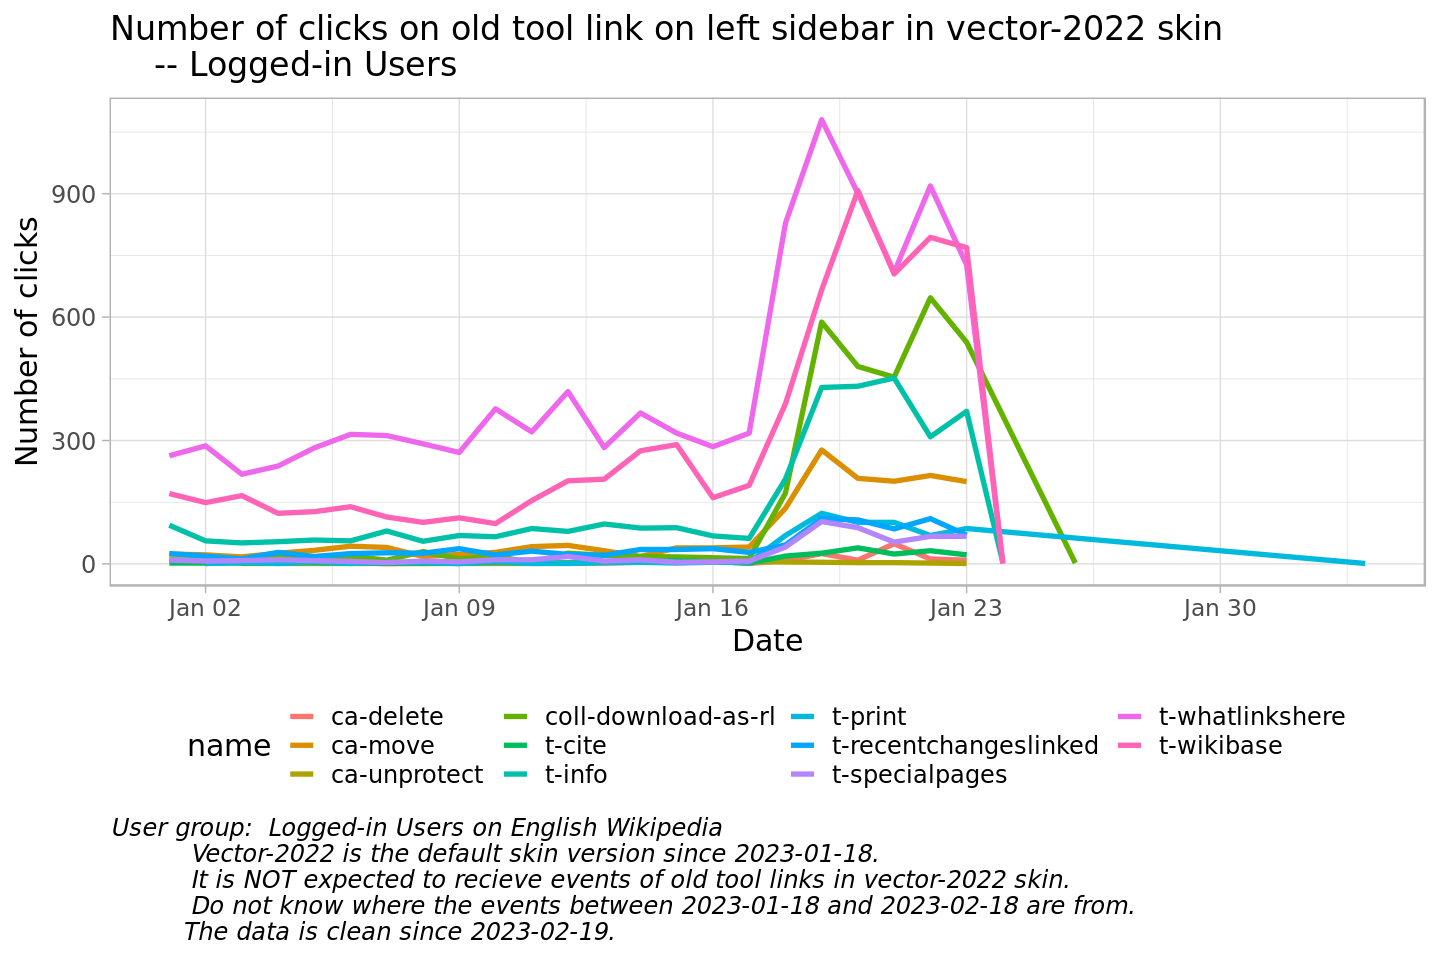

In [191]:
skin_daily_click_old_link_vector22_login_g <- df_daily_clicks_old_link_enwiki %>%
   filter(skin=='vector-2022'& is_anon=='false') %>%
   # exclude the recent incompleted day
   # slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=clicks, color=name)) +
   geom_line( size = 1.5) +
  labs(title = 'Number of clicks on old tool link on left sidebar in vector-2022 skin 
    -- Logged-in Users',
     x = 'Date',
     y = 'Number of clicks',
      caption = 'User group:  Logged-in Users on English Wikipedia
          Vector-2022 is the default skin version since 2023-01-18.
          It is NOT expected to recieve events of old tool links in vector-2022 skin. 
          Do not know where the events between 2023-01-18 and 2023-02-18 are from.
         The data is clean since 2023-02-19. ' ) +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=20))
skin_daily_click_old_link_vector22_login_g

## Anonymous users

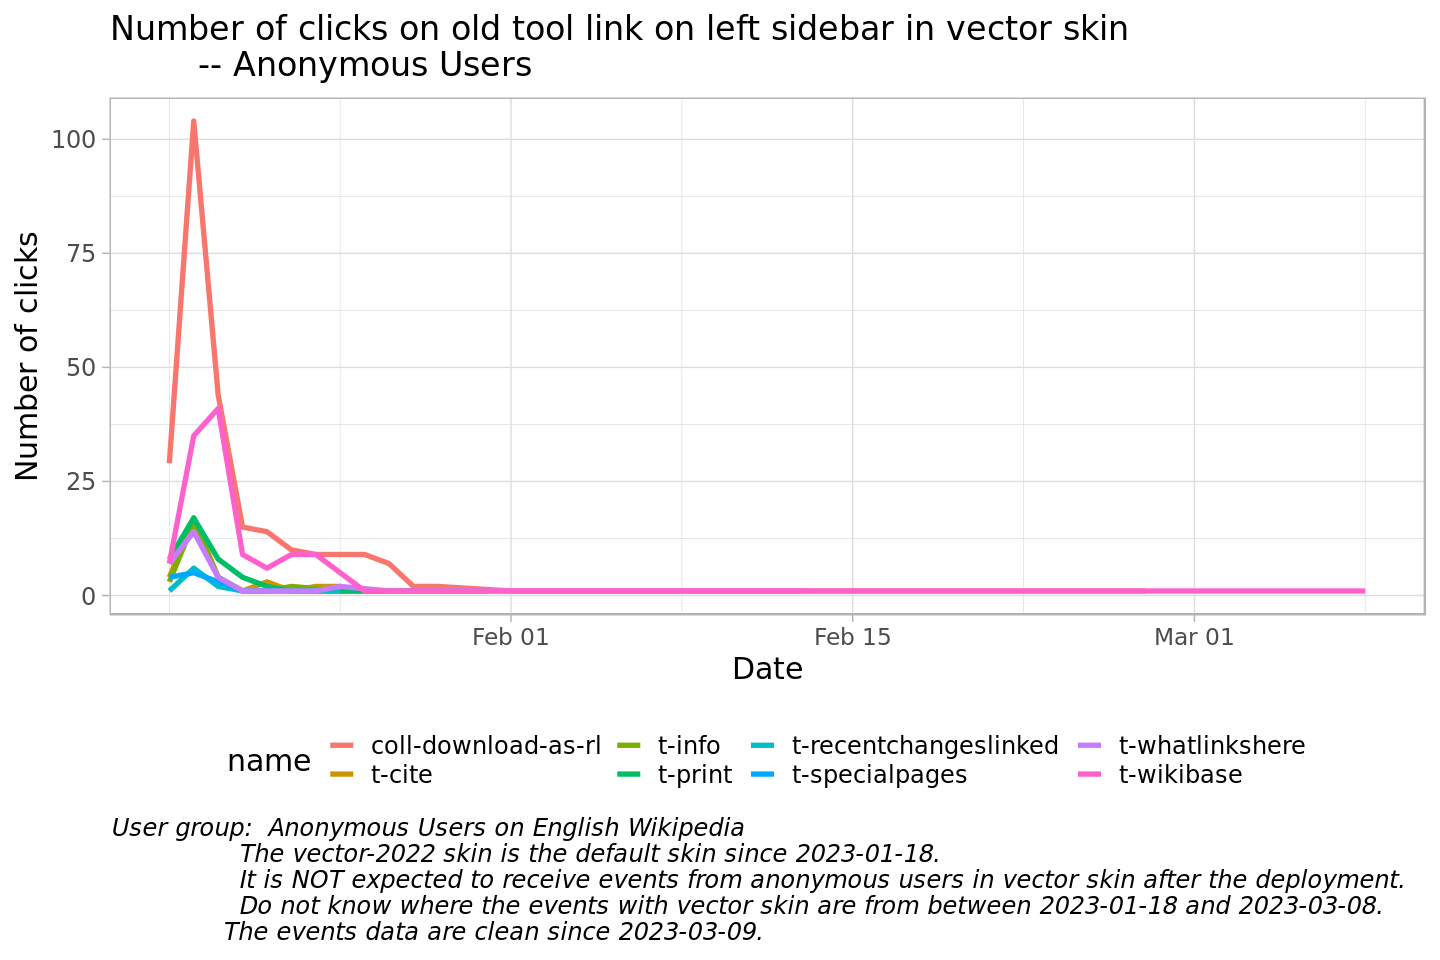

In [193]:
skin_daily_click_old_link_vector_anon_g <- df_daily_clicks_old_link_enwiki %>%
   filter(skin=='vector'& is_anon=='true') %>%
   # exclude the recent incompleted day
   # slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=clicks, color=name)) +
   geom_line( size = 1.5) +
  labs(title = 'Number of clicks on old tool link on left sidebar in vector skin 
        -- Anonymous Users',
     x = 'Date',
     y = 'Number of clicks',
      caption = 'User group:  Anonymous Users on English Wikipedia
                The vector-2022 skin is the default skin since 2023-01-18. 
                It is NOT expected to receive events from anonymous users in vector skin after the deployment. 
                Do not know where the events with vector skin are from between 2023-01-18 and 2023-03-08.
              The events data are clean since 2023-03-09. ') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=20))
skin_daily_click_old_link_vector_anon_g

In [176]:
 df_daily_clicks_old_link_enwiki %>%
   filter(skin=='vector'& is_anon=='true') %>%
   arrange(event_date) %>%
   tail(5)

,event_date,skin,is_anon,name,event_tokens,clicks
,<date>,<chr>,<chr>,<chr>,<int>,<int>
65,2023-02-03,vector,true,t-whatlinkshere,1,1
66,2023-02-13,vector,true,t-whatlinkshere,1,1
67,2023-02-27,vector,true,coll-download-as-rl,1,1
68,2023-03-02,vector,true,t-wikibase,1,1
69,2023-03-08,vector,true,t-wikibase,1,1


In [149]:
 df_daily_clicks_old_link %>%
   filter(skin=='vector-2022'& is_anon=='false') %>%
   arrange(event_date) %>%
   tail(5)

,event_date,skin,is_anon,name,event_tokens,clicks
,<date>,<chr>,<chr>,<chr>,<int>,<int>
494,2023-02-14,vector-2022,false,t-print,27,36
495,2023-02-15,vector-2022,false,t-print,1,1
496,2023-02-16,vector-2022,false,ca-move,1,1
497,2023-02-16,vector-2022,false,ca-delete,1,1
498,2023-02-18,vector-2022,false,coll-download-as-rl,1,1


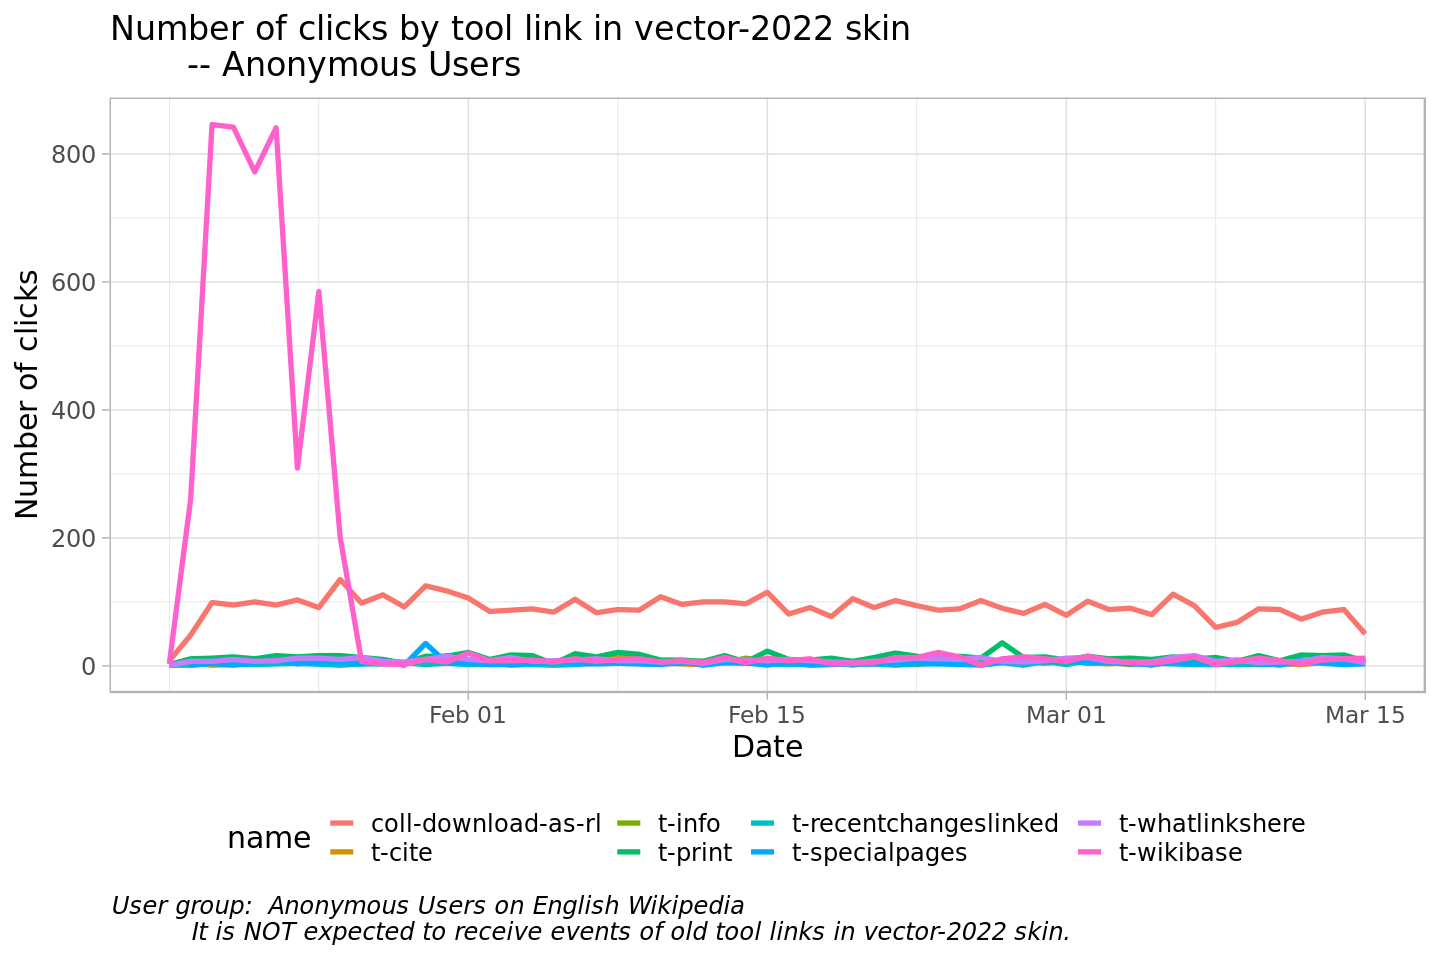

In [192]:
skin_daily_click_old_link_vector22_anon_g <- df_daily_clicks_old_link_enwiki %>%
   filter(skin=='vector-2022'& is_anon=='true') %>%
   # exclude the recent incompleted day
   # slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=clicks, color=name)) +
   geom_line( size = 1.5) +
  labs(title = 'Number of clicks by tool link in vector-2022 skin 
       -- Anonymous Users',
     x = 'Date',
     y = 'Number of clicks',
      caption = 'User group:  Anonymous Users on English Wikipedia
          It is NOT expected to receive events of old tool links in vector-2022 skin.') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=20))
skin_daily_click_old_link_vector22_anon_g

In [178]:
 df_daily_clicks_old_link_enwiki %>%
   filter(skin=='vector-2022')  %>%
   arrange(event_date)

event_date,skin,is_anon,name,event_tokens,clicks
<date>,<chr>,<chr>,<chr>,<int>,<int>
2023-01-01,vector-2022,false,t-cite,1,2
2023-01-01,vector-2022,false,ca-move,15,24
2023-01-01,vector-2022,false,t-specialpages,8,9
2023-01-01,vector-2022,false,t-wikibase,61,171
2023-01-01,vector-2022,false,t-whatlinkshere,50,263
2023-01-01,vector-2022,false,coll-download-as-rl,6,10
2023-01-01,vector-2022,false,t-info,22,94
2023-01-01,vector-2022,false,t-recentchangeslinked,12,25
2023-01-02,vector-2022,false,t-specialpages,6,7


Note: above table shows the events with event name for old tool link but with vector-2022 skin

In [156]:
query_test <- "
select event
FROM event.desktopwebuiactionstracking
WHERe year=2023 and month=3
AND event.action='click'
AND event.name='t-whatlinkshere'
ANd wiki='enwiki' and event.skin='vector-2022'
-- only anonymous users
AND event.isAnon
LIMIT 10
"

In [159]:
df_test <- wmfdata::query_hive(query_test)

Don't forget to authenticate with Kerberos using kinit



In [161]:
query_one <- "
select event
FROM event.desktopwebuiactionstracking
WHERe year=2023
ANd wiki='enwiki'
AND event.token='36bc96c985d782c05f97'
"

In [162]:
df_one <- wmfdata::query_hive(query_one)

Don't forget to authenticate with Kerberos using kinit



In [186]:
query_anon_enwiki_vector22 <- "
SELECT event.skin , event.isAnon AS is_anon,  event.name, 
COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND event.name IN 
(
't-whatlinkshere',
't-recentchangeslinked',
't-specialpages',
't-permalink-page-tools',
't-info',
't-cite',
't-wikibase',
't-whowrotethat',
'ca-delete',
'ca-move',
'ca-unprotect',
'coll-download-as-rl',
't-print'
)
AND wiki='enwiki' AND event.isAnon AND event.skin='vector-2022'
GROUP BY event.skin , event.isAnon, event.name
"

In [187]:
df_anon_enwiki_vector22 <- wmfdata::query_hive(query_anon_enwiki_vector22 )

Don't forget to authenticate with Kerberos using kinit



In [188]:
df_anon_enwiki_vector22

skin,is_anon,name,event_tokens,clicks
<chr>,<chr>,<chr>,<int>,<int>
vector-2022,true,t-wikibase,977,5083
vector-2022,true,t-cite,258,317
vector-2022,true,t-specialpages,213,258
vector-2022,true,coll-download-as-rl,3994,5210
vector-2022,true,t-print,587,753
vector-2022,true,t-whatlinkshere,436,505
vector-2022,true,t-info,327,377
vector-2022,true,t-recentchangeslinked,127,161


In [222]:
query_enwiki_anon <- "
SELECT event.skin , event.isAnon AS is_anon,  event.name, 
COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND event.name IN 
(
't-whatlinkshere',
't-recentchangeslinked',
't-specialpages',
't-permalink-page-tools',
't-info',
't-cite',
't-wikibase',
't-whowrotethat',
'ca-delete',
'ca-move',
'ca-unprotect',
'coll-download-as-rl',
't-print'
)
AND wiki='enwiki'  AND event.isAnon  
GROUP BY event.skin , event.isAnon, event.name
ORDER BY event.skin
LIMIT 10000
"

In [223]:
df_enwiki_anon  <- wmfdata::query_hive(query_enwiki_anon )

Don't forget to authenticate with Kerberos using kinit



In [224]:
df_enwiki_anon 

skin,is_anon,name,event_tokens,clicks
<chr>,<chr>,<chr>,<int>,<int>
vector,true,t-cite,33,34
vector,true,t-info,27,29
vector,true,t-wikibase,110,124
vector,true,t-specialpages,13,13
vector,true,coll-download-as-rl,242,256
vector,true,t-recentchangeslinked,11,12
vector,true,t-print,39,42
vector,true,t-whatlinkshere,32,33
vector-2022,true,t-info,334,386


## Note


__Logged-in users__  
QAed enwiki. 
- The clicks on old tool events are logged correctly on logged-in users since 2023-02-19.

- There are events logged for old tool links in vector-2022 skin between 2023-01-18 and 2023-02-18, which is NOT expected. Do not know the cause. But data is clean since 2023-02-19.


__Anonymous users__   
QAed enwiki. 
- There are events logged for old tool links in vector-2022 skin, which is NOT expected.
- There are events with vector skin  between 2023-01-18 and 2023-03-08. The vector-2022 skin is the default skin since 2023-01-18. It is NOT expected to receive events from anonymous users in vector skin after the deployment. Do not know the cause. Since 2023-03-09, the events from anonymous users are all in vector-2022 skin, which is expected.




# Dump

In [13]:
write_csv(df_test, 'df_test.csv')